#### 1. Создать приложение, которое будет из готового файла с данными «Сбербанка» выводить результат по параметрам:
- Тип данных
- Интервал дат
- Область

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('opendata.csv', index_col=False, encoding='cp1251')

In [3]:
df.head(2)

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508


In [4]:
df.name.unique()

array(['Количество заявок на потребительские кредиты',
       'Средняя сумма заявки на потребительский кредит',
       'Количество заявок на ипотечные кредиты',
       'Средняя сумма заявки на ипотечный кредит',
       'Количество новых депозитов', 'Средняя сумма нового депозита',
       'Средняя зарплата', 'Средняя пенсия',
       'В среднем руб. на текущем счете на человека',
       'В среднем депозитов в руб. на человека',
       'Средние расходы по картам', 'Средний чек в формате Фастфуд',
       'Средний чек в формате Ресторан',
       'Средние траты в ресторане фастфуд', 'Средние траты в ресторане'],
      dtype=object)

In [5]:
def get_result(data, name='Средняя зарплата', region='Россия', from_date='2018-01-15', to_date='2019-01-15'):
    try:
        result = data.copy()
        result = result[result.name == name]
        result = result[result.region == region]
        result = result[(result.date >= from_date) & (result.date <= to_date)]
        return result[['date', 'value']].sort_values(by=['date']).reset_index(drop=True)
    except Exception as e:
        return e
    

In [6]:
result = get_result(df)

In [7]:
result.head()

,date,value
0,2018-01-15,24286
1,2018-02-15,33641
2,2018-03-15,33321
3,2018-04-15,35417
4,2018-05-15,32869


#### 2. Визуализировать выводимые данные с помощью графика.

In [8]:
def draw_graph(data, name='Средняя зарплата', region='Россия', from_date='2018-01-15', to_date='2019-01-15'):
    try:
        r = get_result(data, name, region, from_date, to_date)
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        ax.plot(r.date, r.value)
        plt.title(name + '\n' + region)
    except Exception as e:
        return e

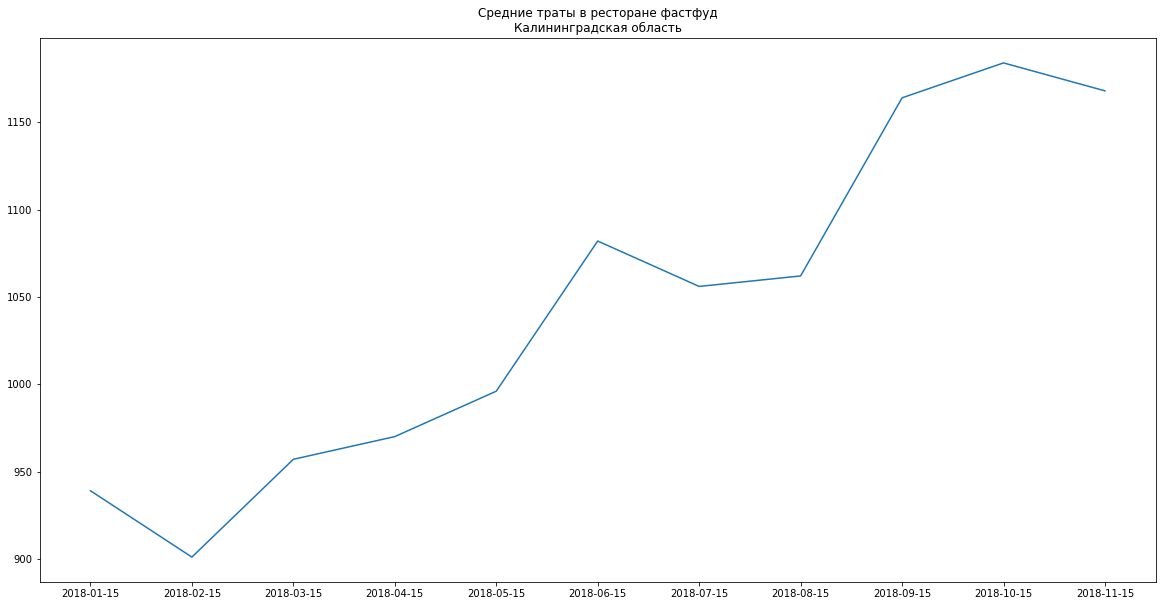

In [9]:
draw_graph(df, 'Средние траты в ресторане фастфуд', 'Калининградская область')